# Election-ML-Project

In [1]:
# importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset :
data=pd.read_csv('ElectionData.csv',parse_dates=['time'])

In [3]:
# lets check the first five records :
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
# check the rows and columns no :
data.shape

(21643, 28)

In [5]:
# check the datatypes :
data.dtypes

TimeElapsed                          int64
time                        datetime64[ns]
territoryName                       object
totalMandates                        int64
availableMandates                    int64
numParishes                          int64
numParishesApproved                  int64
blankVotes                           int64
blankVotesPercentage               float64
nullVotes                            int64
nullVotesPercentage                float64
votersPercentage                   float64
subscribedVoters                     int64
totalVoters                          int64
pre.blankVotes                       int64
pre.blankVotesPercentage           float64
pre.nullVotes                        int64
pre.nullVotesPercentage            float64
pre.votersPercentage               float64
pre.subscribedVoters                 int64
pre.totalVoters                      int64
Party                               object
Mandates                             int64
Percentage 

In [6]:
# total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

In [7]:
# checking the null values :
data.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

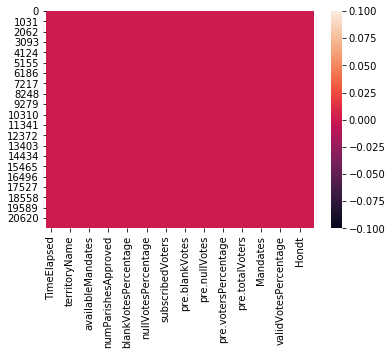

In [8]:
sns.heatmap(data.isnull())

In [9]:
# lets check the column names :
data.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [10]:
data.dtypes[data.dtypes=='object']

territoryName    object
Party            object
dtype: object

In [11]:
data['territoryName'].value_counts()

Porto                  1134
Território Nacional    1134
Braga                  1134
Leiria                 1134
Aveiro                 1080
Viseu                  1080
Setúbal                1080
Lisboa                 1080
Madeira                1080
Viana do Castelo       1080
Coimbra                1080
Évora                  1026
Guarda                 1026
Faro                   1026
Santarém               1026
Bragança                972
Castelo Branco          972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

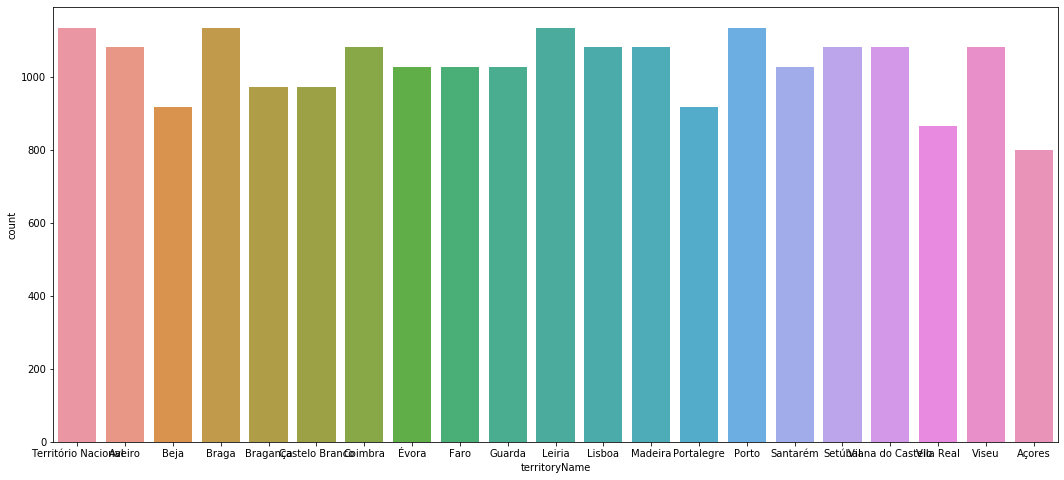

In [12]:
plt.figure(figsize=(18,8))
sns.countplot(data['territoryName'])
plt.show()

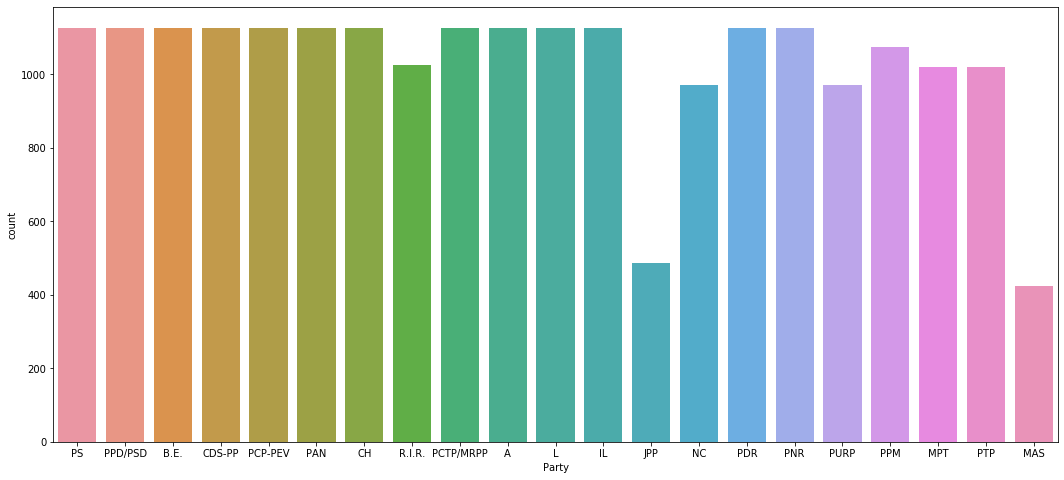

In [13]:
plt.figure(figsize=(18,8))
sns.countplot(data['Party'])
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
# converting catagorical value to numerical :
data['territoryName']=le.fit_transform(data['territoryName'])

In [16]:
data['Party']=le.fit_transform(data['Party'])

In [17]:
data.head(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77


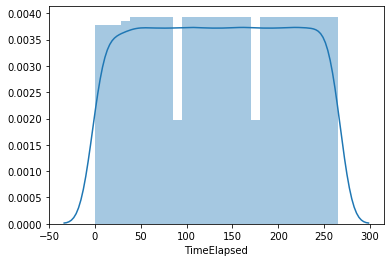

In [18]:
sns.distplot(data['TimeElapsed'])

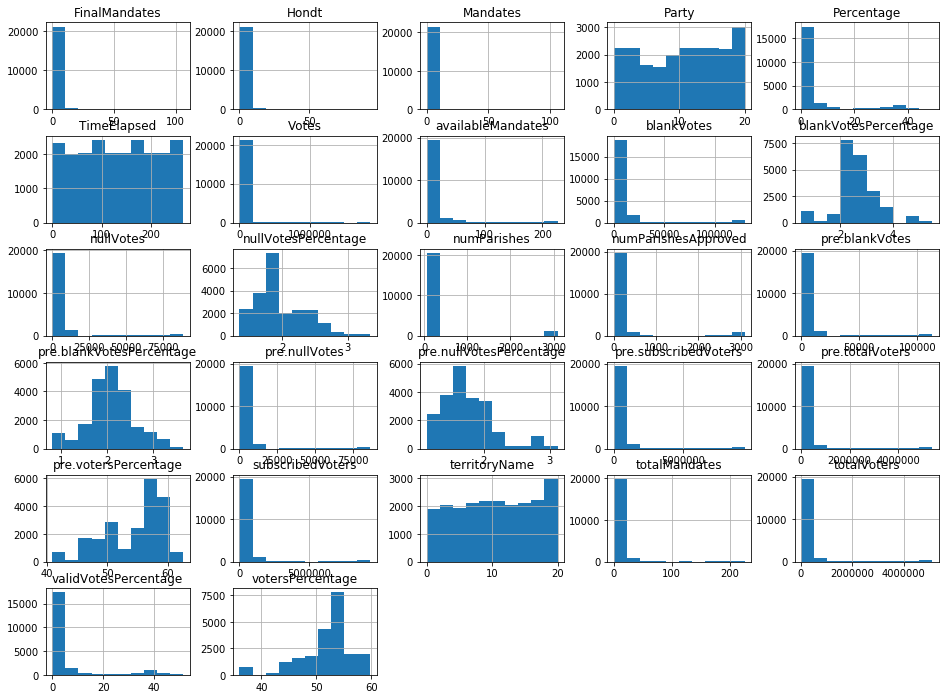

In [19]:
data.hist(figsize=(16,12))
plt.show()

In [20]:
data.drop('time',axis=1,inplace=True)

In [21]:
data.describe()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,...,54.549372,6.378503e+05,3.594932e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,...,4.964948,1.544418e+06,8.763729e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,...,40.870000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,...,51.210000,1.289260e+05,6.964400e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,...,56.260000,2.284970e+05,1.102730e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,...,58.220000,3.933140e+05,2.276200e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,...,62.580000,9.439701e+06,5.380451e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [22]:
dfr=data.corr()
dfr

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,-0.012674,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,...,0.054761,0.193160,0.196667,-0.001169,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
territoryName,-0.012674,1.000000,0.172374,0.181563,0.223300,0.215599,0.178082,-0.302412,0.196554,-0.126432,...,0.078855,0.196979,0.195102,0.012263,0.057823,-0.003433,-0.004874,0.078520,0.084131,0.077042
totalMandates,0.260377,0.172374,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,...,0.151927,0.972976,0.975404,-0.003111,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.181563,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,...,0.080524,0.391272,0.383089,-0.001882,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.223300,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,...,0.026407,0.860782,0.853779,-0.004013,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.215599,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,...,0.042180,0.949110,0.943147,-0.003765,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.178082,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,...,0.161642,0.998487,0.998178,-0.003826,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.302412,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,...,-0.105314,0.002821,-0.000069,-0.019692,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.196554,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,...,0.154965,0.999296,0.998706,-0.003172,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.126432,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,...,-0.233688,-0.153891,-0.159566,0.007069,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659


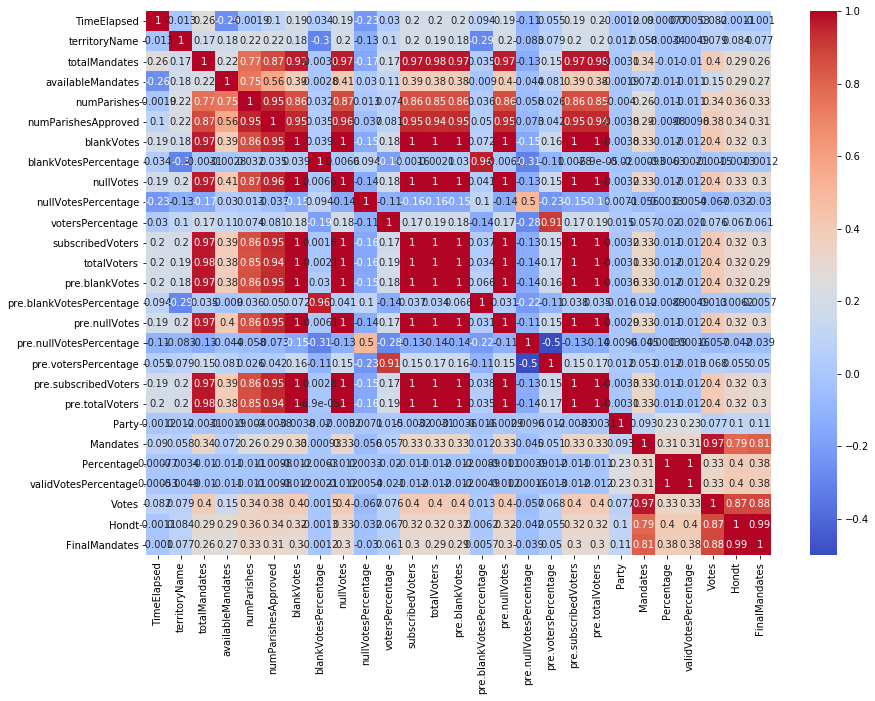

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True,cmap='coolwarm')
plt.show()

In [24]:
# check the outliers from the dataset :
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data=data.loc[(z_score<3).all(axis=1)]
print(data.shape)

(21643, 27)
(18333, 27)


In [25]:
dfc=data.corr()
dfc

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,-0.014058,0.533703,-0.426620,0.013366,0.331329,0.418966,-0.008021,0.432557,-0.187996,...,0.053627,0.431723,0.414576,0.002327,0.144083,0.020268,0.020051,0.144275,-0.003749,-0.008894
territoryName,-0.014058,1.000000,-0.051149,0.015508,-0.028879,-0.024180,-0.124181,-0.188406,-0.071117,-0.170589,...,-0.098160,-0.044784,-0.051166,0.003190,-0.036229,-0.013405,-0.014330,-0.041095,-0.028773,-0.029463
totalMandates,0.533703,-0.051149,1.000000,-0.071102,0.243249,0.385172,0.937117,0.038455,0.953382,-0.347764,...,0.323750,0.961605,0.958983,-0.000570,0.256162,0.006533,0.006176,0.307580,0.135548,0.136280
availableMandates,-0.426620,0.015508,-0.071102,1.000000,0.027682,-0.277978,0.064957,0.015277,0.067461,-0.102254,...,0.290537,0.073969,0.091573,0.004884,-0.019317,0.005259,0.005143,0.032101,0.222333,0.235422
numParishes,0.013366,-0.028879,0.243249,0.027682,1.000000,0.884127,0.337858,0.294537,0.307781,0.287765,...,-0.197694,0.255439,0.248901,-0.006624,0.055458,-0.034539,-0.033080,0.065836,0.031196,0.034357
numParishesApproved,0.331329,-0.024180,0.385172,-0.277978,0.884127,1.000000,0.447073,0.249236,0.427258,0.205013,...,-0.186510,0.374793,0.359600,-0.004661,0.094435,-0.021218,-0.020010,0.107367,-0.010036,-0.012594
blankVotes,0.418966,-0.124181,0.937117,0.064957,0.337858,0.447073,1.000000,0.227530,0.982586,-0.332077,...,0.423152,0.971859,0.972237,0.001009,0.252523,0.015886,0.016191,0.324788,0.164474,0.166591
blankVotesPercentage,-0.008021,-0.188406,0.038455,0.015277,0.294537,0.249236,0.227530,1.000000,0.101555,0.246189,...,0.194159,0.050734,0.050493,0.005895,0.044244,0.041265,0.045027,0.042353,0.038164,0.040237
nullVotes,0.432557,-0.071117,0.953382,0.067461,0.307781,0.427258,0.982586,0.101555,1.000000,-0.301909,...,0.368415,0.991753,0.990454,0.000289,0.247941,0.008143,0.008096,0.324080,0.161091,0.163011
nullVotesPercentage,-0.187996,-0.170589,-0.347764,-0.102254,0.287765,0.205013,-0.332077,0.246189,-0.301909,1.000000,...,-0.429231,-0.363214,-0.369702,-0.003999,-0.095576,-0.032004,-0.029391,-0.128851,-0.074802,-0.076323


In [26]:
data.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
FinalMandates               6.746120
d

In [27]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [28]:
data.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               0.020702
availableMandates           0.503375
numParishes                -0.138265
numParishesApproved        -1.099103
blankVotes                 -0.592756
blankVotesPercentage       -0.844508
nullVotes                  -0.880145
nullVotesPercentage         0.329675
votersPercentage           -0.392023
subscribedVoters           -0.772107
totalVoters                -0.647681
pre.blankVotes             -0.642916
pre.blankVotesPercentage   -0.410446
pre.nullVotes              -0.937998
pre.nullVotesPercentage     0.628444
pre.votersPercentage       -0.514215
pre.subscribedVoters       -0.802802
pre.totalVoters            -0.670218
Party                       0.009657
Mandates                    4.479200
Percentage                  1.565493
validVotesPercentage        1.550088
Votes                       0.268973
Hondt                       3.488567
FinalMandates               3.368168
d

In [29]:
# splitting the data into input and output :
X=data.drop('FinalMandates',axis=1)
y=data['FinalMandates']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
# importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
# importing esential libraries :
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [33]:
# here we will create the object :
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)

In [34]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [35]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',name,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('\n',model)
    Model.append(name)
    model.fit(X_train,y_train)
    predm=model.predict(X_test)
    r2=r2_score(y_test,predm)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,predm)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> LinearRegression <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.978766886660872
Mean_Squared_Error = 0.003842719930025279
Cross_Val_Score =  0.9789832736106698


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Lasso <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0003459809912755851
Mean_Squared_Error = 0.18104031079569105
Cross_Val_Score =  -0.00010238490024101487


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Ridge <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.9787900086290993
Mean_Squared_Error = 0.003838535369489607
Cross_Val_Score =  0.9789145454320558


>>>>>>>>>>>>>>

In [36]:
final= pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
final

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.978767,0.004,0.978983
1,Lasso,-0.000346,0.181,-0.000102
2,Ridge,0.978790,0.004,0.978915
3,DecisionTreeRegressor,0.997888,0.000,0.997252
4,KNeighborsRegressor,0.722596,0.050,0.676584
5,AdaBoostRegressor,0.977438,0.004,0.977598
6,RandomForestRegressor,0.999089,0.000,0.997592
7,GradientBoostingRegressor,0.990056,0.002,0.990418


# Conclusion- We will go with GradientBoostingRegressor

In [37]:
# saving the model :
import joblib
joblib.dump(GBR,'election.pkl')

['election.pkl']

In [38]:
# lets load the model :
model=joblib.load('election.pkl')

In [ ]:
# predict the model :
model.predict(X_test)